# E17 - 다양한 OCR모델 비교하기

In [1]:
import os

image_dir = os.getenv('HOME') + '/aiffel/ocr_python/dataset'
image_name_list = os.listdir(image_dir)
image_path = [os.path.join(image_dir, image_name) for image_name in image_name_list]

## keras-ocr 모델

In [2]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel0042/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/aiffel0042/.keras-ocr/crnn_kurapan.h5


In [3]:
images = [ keras_ocr.tools.read(image) for image in image_path]
prediction_groups = [pipeline.recognize([image]) for image in image_path]

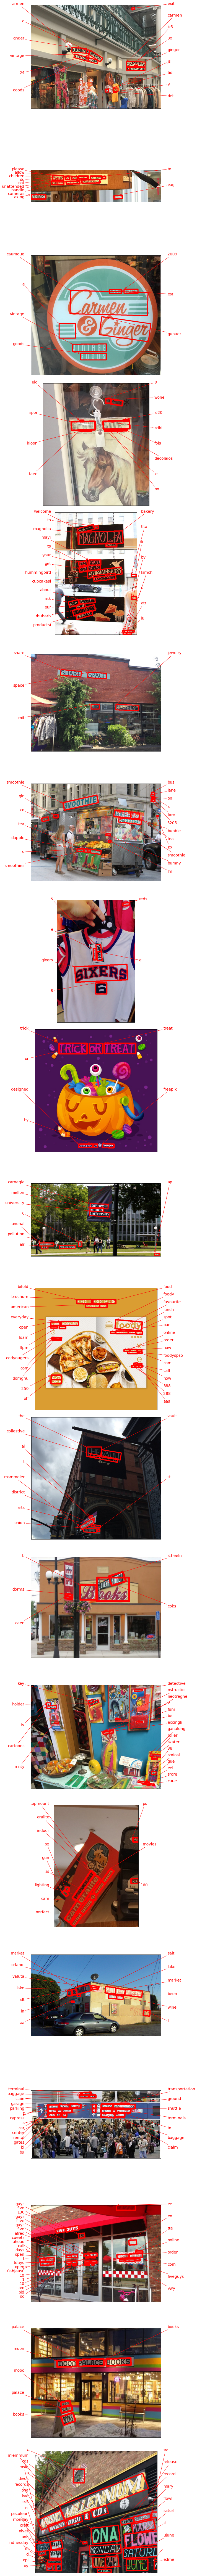

In [22]:
# Plot the predictions

fig, axs = plt.subplots(nrows=len(images), figsize=(10, 130))

for idx, ax in enumerate(axs):
#     if idx % 2 == 0:
#         ax.imshow(images[idx//2])
#         ax.axis('off')
#         pass
#     else:
    keras_ocr.tools.drawAnnotations(image=images[idx],
                                        predictions=prediction_groups[idx][0], ax=ax)
    plt.tight_layout()

## Tesseract 모델

In [9]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor', sudo apt install tesseract-ocr-kor
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list, recognized_data['text']


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/dataset/dataset12.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/home/aiffel0042/aiffel/ocr_python/0000.png
/home/aiffel0042/aiffel/ocr_python/0001.png
/home/aiffel0042/aiffel/ocr_python/0002.png
/home/aiffel0042/aiffel/ocr_python/0003.png
/home/aiffel0042/aiffel/ocr_python/0004.png
/home/aiffel0042/aiffel/ocr_python/0005.png
/home/aiffel0042/aiffel/ocr_python/0006.png
/home/aiffel0042/aiffel/ocr_python/0007.png
/home/aiffel0042/aiffel/ocr_python/0008.png
/home/aiffel0042/aiffel/ocr_python/0009.png
/home/aiffel0042/aiffel/ocr_python/0010.png
/home/aiffel0042/aiffel/ocr_python/0011.png


In [8]:
detect_list_count = []
for image in image_path:
    list, count = crop_word_regions(image, work_dir)
    detect_list_count.append(count)
a = [print(x) for x in detect_list_count]

['', '', '', '', ' ', '', '', '', '']
['', '', '', '', ' ', '', '', '', 'Please', 'do', 'nox', 'allow', 'children', '*°', '', 'andle', 'cameras', 'Wnartende', '', '', '', ' ', '', '', '', '']
['', '', '', '', '']
['', '', '', '', '']
['', '', '', '', ' ', '', '', '', ' ', '', '', '', ' ', '', '', '', ' ', '', '', '', '']
['', '', '', '', ' ', '', '', '', ' ', '', '', '', '']
['', '', '', '', '']
['', '', '', '', '']
['', '', '', '', ' ', '', '', '', 'eee', 'Ric']
['', '', '', '', '']
['', '', '', '', '']
['', '', '', '', '']
['', '', '', '', '']
['', '', '', '', '']
['', '', '', '', '']
['', '', '', '', ' ', '', '', '', '']
['', '', '', '', '']
['', '', '', '', '']
['', '', '', '', '']
['', '', '', '', '    ', '   ', '', '', '', 'e', 'aS)', '', '', '', 'ry']


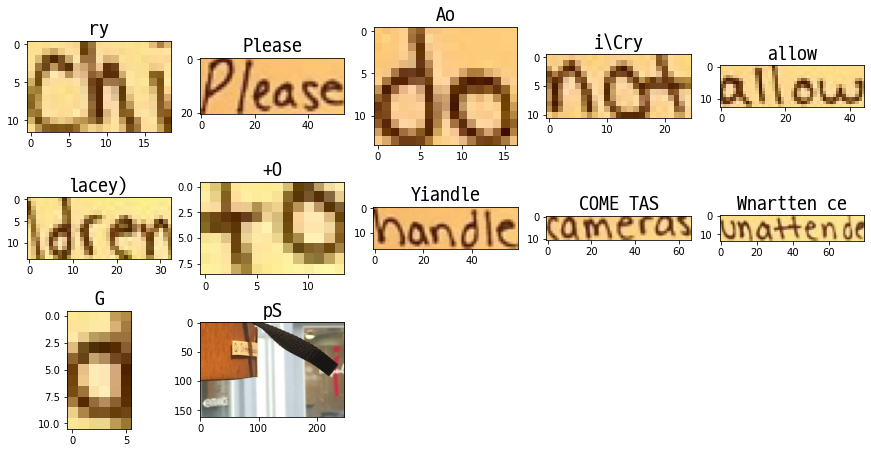

Done


In [13]:
from matplotlib.image import imread
import matplotlib.font_manager as fm
font_path = os.getenv('HOME')+'/.local/share/fonts/D2Coding/D2Coding-Ver1.3.2-20180524.ttf'
fontprop = fm.FontProperties(fname=font_path, size=20)

plt.figure(figsize=(15, 10))
image_to_string_list = []
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for idx, image_path in enumerate(cropped_image_path_list):
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        image_to_string_list.append(recognized_data['text'][:-2])
        img = imread(image_path)
        plt.subplot(4, 5, idx + 1)
        plt.imshow(img)
        plt.title(recognized_data['text'][:-2], fontproperties=fontprop)
    plt.show()
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list[0])

## 최종 결과

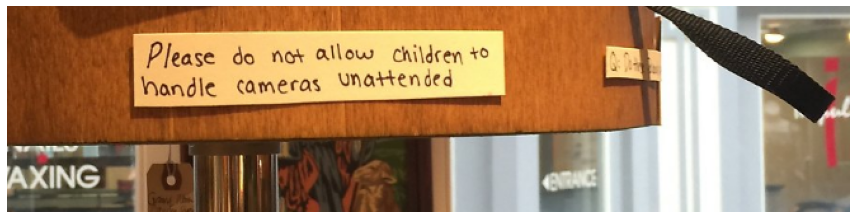

In [14]:
plt.figure(figsize=(12,10))
plt.imshow(imread('/home/aiffel0042/aiffel/ocr_python/dataset/dataset12.png'))
plt.axis('off')
plt.tight_layout()
plt.show()

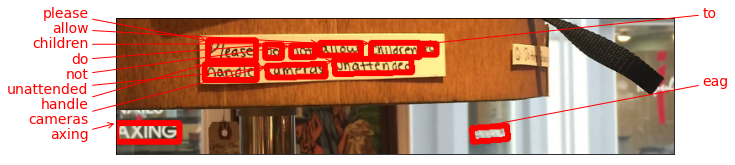

In [15]:
fig = plt.figure(figsize=(10,60))
ax = fig.add_subplot(111)
keras_ocr.tools.drawAnnotations(image=images[1],
                                predictions=prediction_groups[1][0], ax=ax)
plt.show()

In [16]:
keras_ocr_model = [prediction_groups[1][0][x][0] for x in range(len(prediction_groups[1][0]))]
tesseract_model = image_to_string_list
print("keras-ocr 모델", keras_ocr_model, sep='\n', end='\n\n')
print("tesseract 모델", tesseract_model, sep='\n')

keras-ocr 모델
['please', 'allow', 'children', 'to', 'do', 'not', 'unattended', 'handle', 'cameras', 'axing', 'eag']

tesseract 모델
['ry', 'Please', 'Ao', 'i\\Cry', 'allow', 'lacey)', '+O', 'Yiandle', 'COME TAS', 'Wnartten ce', 'G', 'pS']


구글 결제 계좌 폐쇄로 api를 사용할 수 없음.   
keras-ocr은 텍스트를 제대로 찾아서 인식하였음.   
tesseract-ocr은 정제된 텍스트 영역만 있을 경우 거의 찾기는 하지만 사진은 대부분 실패. Please, allow만 제대로 인식하였음.   